In [ ]:
import pandas as pd
import numpy as np
!pip install matplotlib--upgrade
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
birthday_df = pd.read_excel('/content/drive/MyDrive/US_births_1994-2014_astrology.xlsx')
birthday_df.tail(5)

In [11]:
#changing float -> integer
birthday_df[['month','date_of_month','births','year','day_of_week']]=birthday_df[['month','date_of_month','births','year','day_of_week']].astype(int)



In [ ]:
birthday_df['month']=birthday_df['month'].replace([1], 'January')
birthday_df['month']=birthday_df['month'].replace([2], 'February')
birthday_df['month']=birthday_df['month'].replace([3], 'March')
birthday_df['month']=birthday_df['month'].replace([4], 'Apirl')
birthday_df['month']=birthday_df['month'].replace([5], 'May')
birthday_df['month']=birthday_df['month'].replace([6], 'June')
birthday_df['month']=birthday_df['month'].replace([7], 'Jully')
birthday_df['month']=birthday_df['month'].replace([8], 'August')
birthday_df['month']=birthday_df['month'].replace([9], 'September')
birthday_df['month']=birthday_df['month'].replace([10], 'October')
birthday_df['month']=birthday_df['month'].replace([11], 'November')
birthday_df['month']=birthday_df['month'].replace([12], 'December')
birthday_df

Text(0.5, 1.0, 'Birthdays Are Less Frequent On/Around Major Holidays')

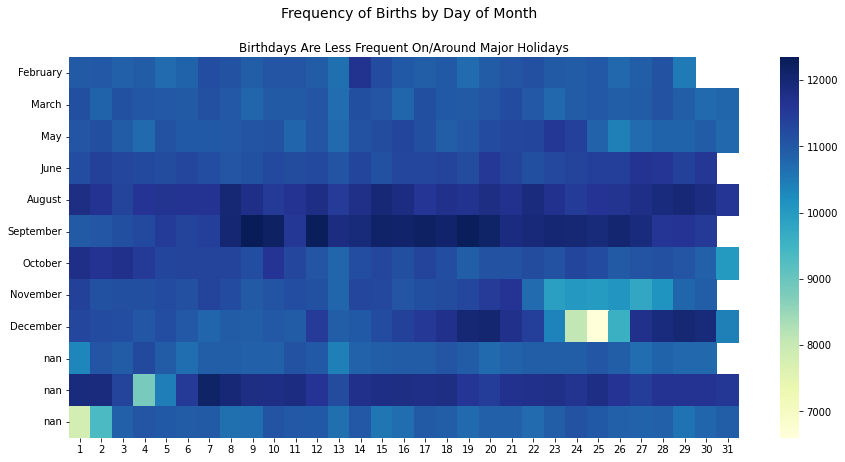

In [23]:
#resizing to see each date in month
fig, ax = plt.subplots(figsize=(15, 7))

#plot set up
birthday_map = pd.pivot_table(birthday_df, values= 'births',
                              index = ['month'],
                              columns = 'date_of_month')
birthday_map.index = pd.CategoricalIndex(birthday_map.index, 
                                         categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
birthday_map.sort_index(axis=0, ascending=True, inplace=True)
sns.heatmap(birthday_map, cmap="YlGnBu")

#reducing redundancy
plt.ylabel('')
plt.xlabel('')

#title
plt.suptitle('Frequency of Births by Day of Month', fontsize = 14, x=.44) # x value to shift towards the center of graph
plt.title('Birthdays Are Less Frequent On/Around Major Holidays')

In [ ]:
birthday_df.groupby(['month'])['births'].sum()

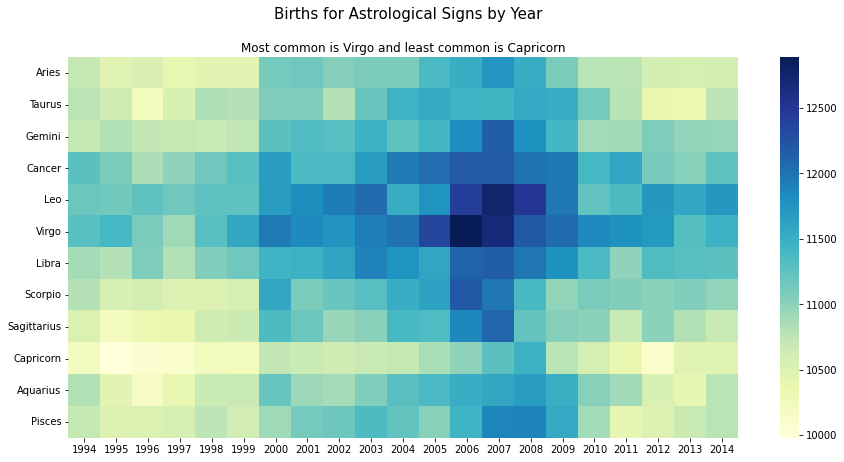

In [22]:
#resizing
fig, ax = plt.subplots(figsize=(15, 7))

sign_map = pd.pivot_table(birthday_df, values= 'births',index = ['astrological_sign'],columns = 'year')
sign_map.index = pd.CategoricalIndex(sign_map.index, categories = ['Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces'])
sign_map.sort_index(axis=0, ascending=True, inplace=True)
sns.heatmap(sign_map, cmap="YlGnBu")

#remove labels
plt.ylabel('')
plt.xlabel('')

#titles
plt.suptitle('Births for Astrological Signs by Year', fontsize = 15, x = .44)
plt.title('Most common is Virgo and least common is Capricorn');

In [ ]:
#plot set up
monthly_births = birthday_df.groupby(['month'])['births'].sum()
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.barplot(x = monthly_births.index, y = monthly_births.values,order= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

#set y axis range
max_y = monthly_births.values.max()
plt.ylim(0, (max_y+1000000)) #add cushion above our max




#set axis labels invisible as they are redundant
ax.get_yaxis().set_visible(False)
plt.xlabel('')

#Title
plt.title('Number of people born each month for US births from 1994-2014', fontsize=14);

In [ ]:
#resizing 
fig, ax = plt.subplots(figsize=(20, 5))

#plot set up
sign_births = birthday_df.groupby(['astrological_sign'])['births'].sum()
signs_bar = sns.barplot(x = sign_births.index,
                        y = sign_births.values,
                        order= ['Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces'])

#set y axis range
max_y = sign_births.values.max()
plt.ylim(0, (max_y+1000000)) #add cushion above our max

#reduce redundancy
ax.get_yaxis().set_visible(False)
plt.xlabel('')
 

#title
plt.title('Number of People in Each Sign for US births from 1994-2014', fontsize = 16);

In [ ]:
#ensuring that our barplot matches our expected values
birthday_df.groupby(['astrological_sign'])['births'].sum()